# Datasets

It is commonly known, that the right and appropriate dataset and it's preprocessing is crucial for ML and DL tasks. For the facial expression recognition task we have found two options: $\href{https://research.google/tools/datasets/google-facial-expression/}{datsaset}$ from google research and the $\href{https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data?select=fer2013.tar.gz}{fer\_2013}$ from kaggle.

In the following notebook, we will represent those datasets and briefly analyze them to choose a better one.

### Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### 1. Dataset from google research

In [37]:
df = pd.read_csv('data/google_dataset/data/legend.csv').dropna()
df.emotion = df.emotion.apply(str.lower)

In [38]:
df.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [39]:
df.describe()

,user.id,image,emotion
count,13690,13690,13690
unique,5,13682,8
top,dwdii,Kimora_Lee_0001.jpg,neutral
freq,6667,2,6868


In [40]:
def show(img, figsize=(5, 5), title=''):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(title)
    plt.show()

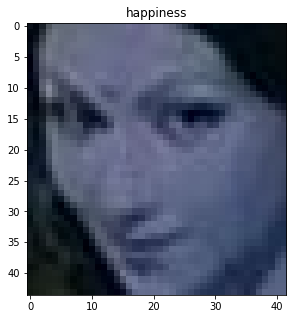

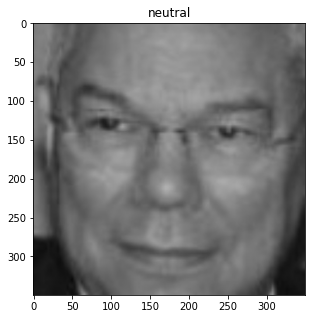

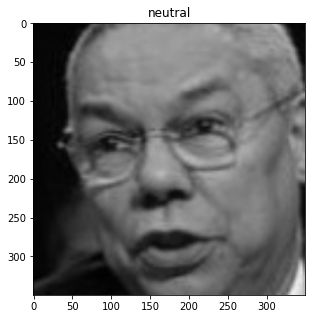

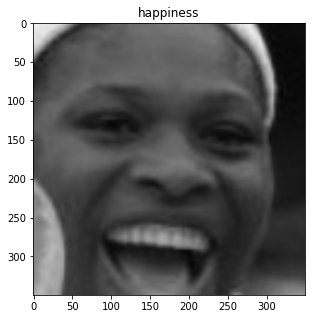

In [41]:
for i in np.random.randint(0, 13690, (4, )):
    img = cv2.imread('data/google_dataset/images/' + df.iloc[i].image)
    show(img, title=df.iloc[i].emotion)

As we can see from this example, the first problem with this dataset is that pictures may have different shapes, scales and resolutions.

Now let's look at the distribution of different classes.

<AxesSubplot:title={'center':'Classes distribution in google-research dataset'}, xlabel='Emotion', ylabel='N appearence'>

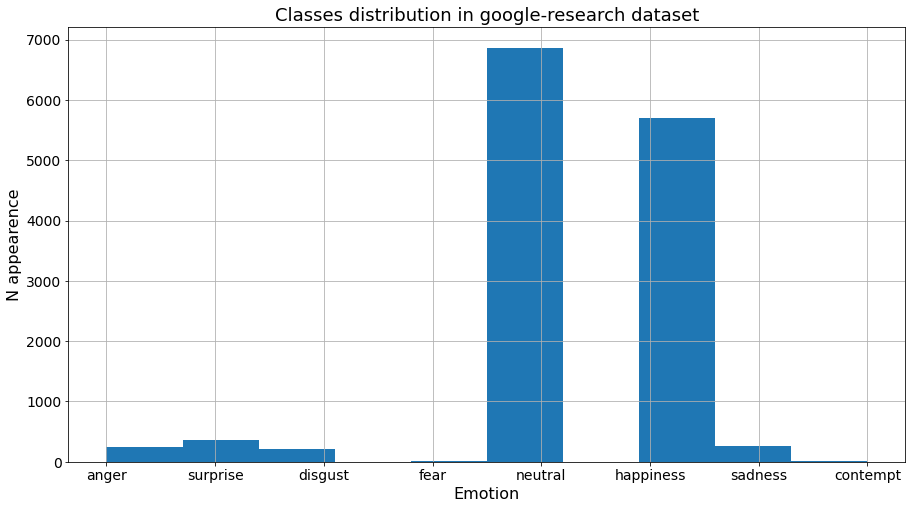

In [42]:
plt.figure(figsize=(15, 8))
plt.title('Classes distribution in google-research dataset', fontsize=18)
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('N appearence', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

df.emotion.hist()

This is a very bad sign. Classes distribution is unbalanced, which can cause some serious difficulties during the learning process. It will lead to bad scores for all classes, except for happiness and neutral.

### 2. FER 2013 from Kaggle

Let's try to look at the other, kaggle dataset.

In [21]:
train_dir = 'data/fer_2013/train'
test_dir = 'data/fer_2013/test'
emotions = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
data_dict = {
    'emotion': [],
    'usage': [],
    'image': [],
}
for emo in emotions:
    dir_list = os.listdir(os.path.join(train_dir, emo))
    data_dict['emotion'].extend([emo] * len(dir_list))
    data_dict['usage'].extend(['Train'] * len(dir_list))
    data_dict['image'].extend(dir_list)
    
    dir_list = os.listdir(os.path.join(test_dir, emo))
    data_dict['emotion'].extend([emo] * len(dir_list))
    data_dict['usage'].extend(['Test'] * len(dir_list))
    data_dict['image'].extend(dir_list)
    
data = pd.DataFrame.from_dict(data_dict)

In [22]:
data.shape

(35887, 3)

In [23]:
data.head()

,emotion,usage,image
0,angry,Train,im2072.png
1,angry,Train,im771.png
2,angry,Train,im2714.png
3,angry,Train,im2700.png
4,angry,Train,im765.png


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null object
usage      35887 non-null object
image      35887 non-null object
dtypes: object(3)
memory usage: 841.2+ KB


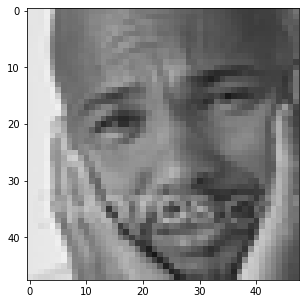

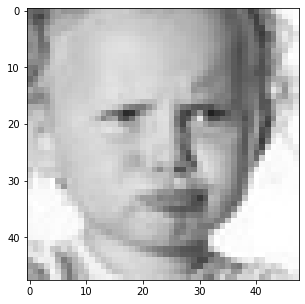

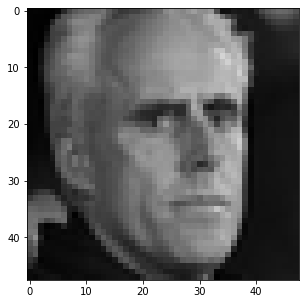

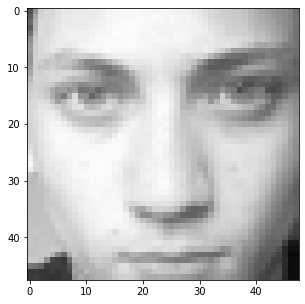

In [28]:
for i in np.random.randint(0, 35887, (4, )):
    img = cv2.imread(os.path.join(train_dir, data.iloc[i].emotion, data.iloc[i].image))
    show(img)

In this dataset all images are given with the same shape of (48, 48) and all of them contain only one face, that takes most of the picture space. 

Also we have pretty good news about classes distribution:

<AxesSubplot:title={'center':'Classes distribution in fer 2013 dataset'}, xlabel='Emotion', ylabel='N appearence'>

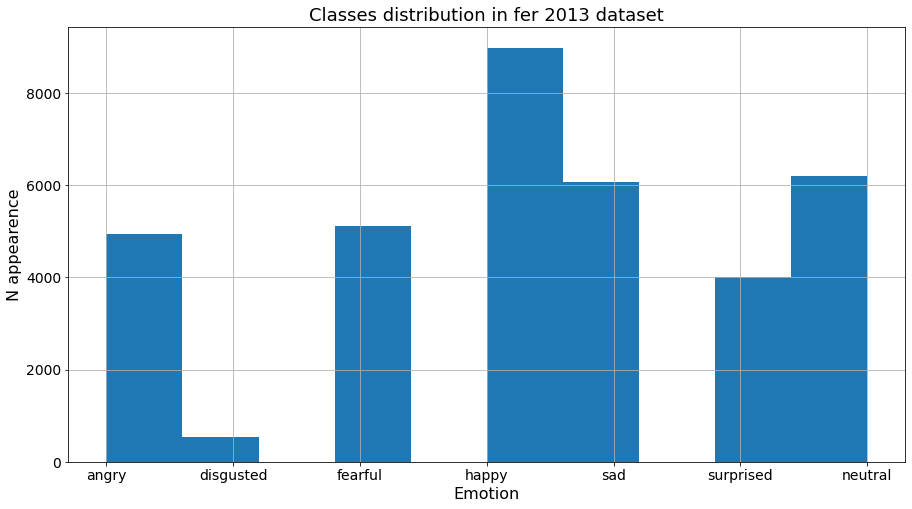

In [35]:
plt.figure(figsize=(15, 8))
plt.title('Classes distribution in fer 2013 dataset', fontsize=18)
plt.xlabel('Emotion', fontsize=16)
plt.ylabel('N appearence', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
data.emotion.hist()

This is still not perfect, but way better, than the previous one.

### Conclusion

Kaggle dataset is much better, because it does not need major preprocessing and classes are more evenly distributed, which will make our future model more flexible and accurate in different test cases.